In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import seaborn as sns

In [4]:
data = load_breast_cancer()
X, y = data.data , data.target
labels = data.target_names
features = data.feature_names

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
print(X[0 : 4])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [9]:
print(data.target_names)

['malignant' 'benign']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
np.random.seed(42)
noise_factor = 0.5
X_noisy = X_scaled + noise_factor * np.random.normal(loc = 0.0 , scale = 1.0 , size = X.shape)
df = pd.DataFrame(X_scaled , columns=features)
df_noisy = pd.DataFrame(X_noisy , columns=features)

In [12]:
print("Original Data (First 5 rows):")
df.head()

Original Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [13]:
print("Noisy Data")
df_noisy.head()

Noisy Data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,2.258025,-0.798130,2.954012,1.530937,-1.076461,1.035718,0.217611,0.817944,0.694745,0.200931,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,0.868488,-0.790559,0.205503,0.591850,-1.344612,-1.052848,-0.671099,0.788723,-0.633641,-0.980964,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,1.409374,-0.011065,0.833015,1.963658,-1.606878,1.225925,0.256600,1.275324,0.282916,-0.700225,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,-0.381312,-0.320732,0.115236,-0.689517,0.609059,2.946306,1.762611,1.202296,4.861456,2.010288,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,0.495211,-0.755962,0.742038,1.427153,1.023355,0.726447,0.436844,0.983174,0.045666,-0.116104,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


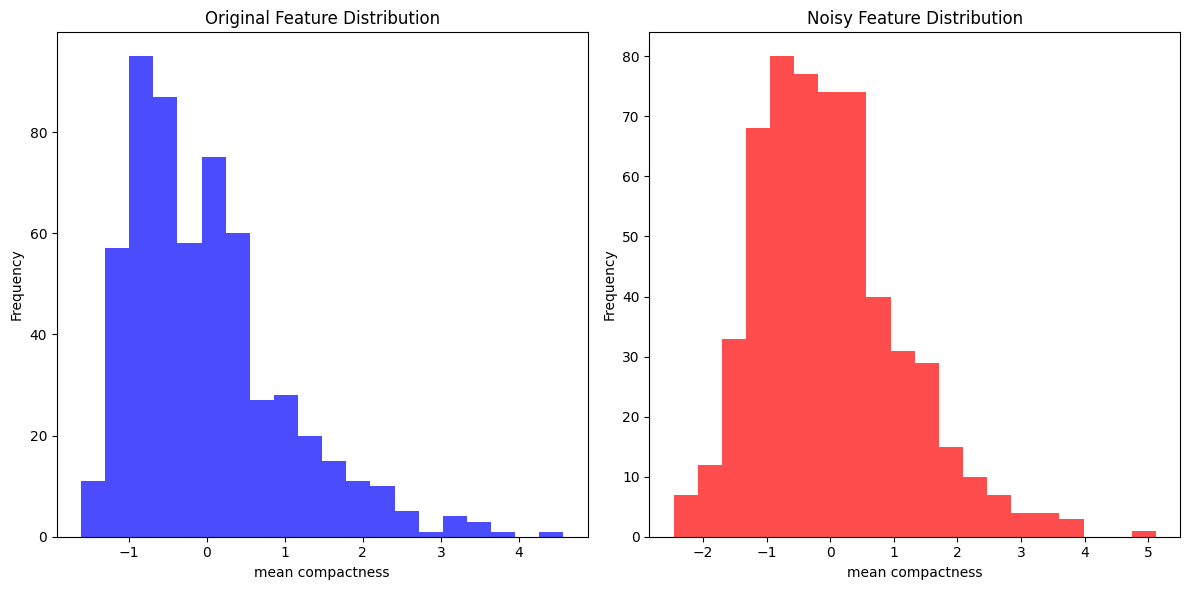

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1 , 2 , 1)
plt.hist(df[features[5]] , bins=20 , alpha = 0.7,  color='blue' , label='Original')
plt.title('Original Feature Distribution')
plt.xlabel(features[5])
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_noisy[features[5]], bins=20, alpha=0.7, color='red', label='Noisy') 
plt.title('Noisy Feature Distribution')
plt.xlabel(features[5])
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

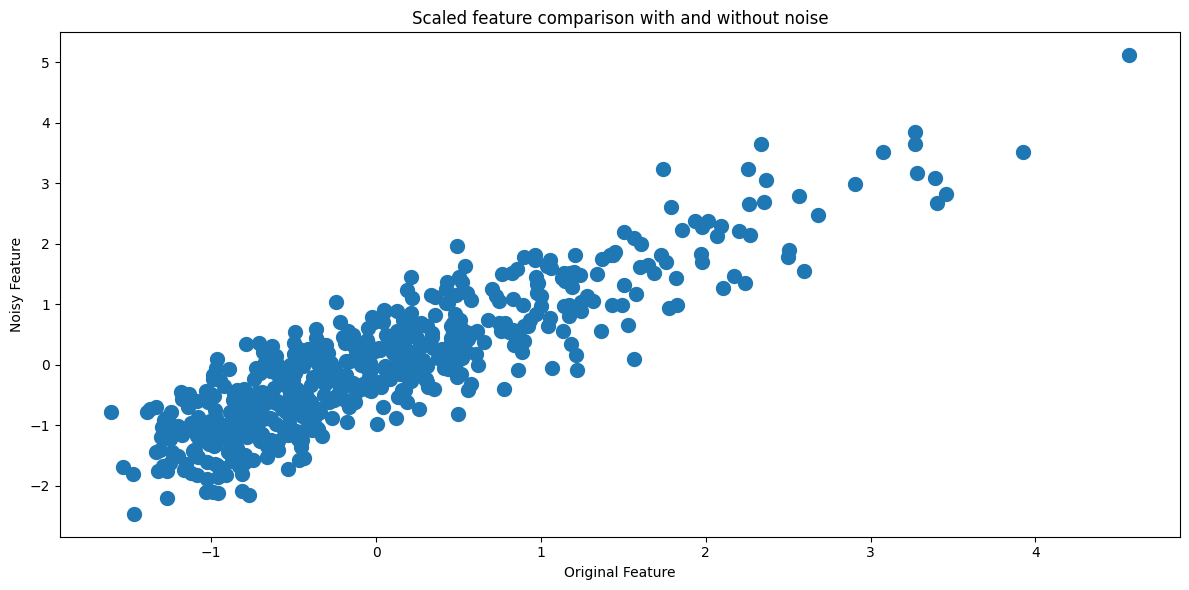

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df[features[5]], df_noisy[features[5]],lw=5)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

# Fit the models to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [18]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [19]:
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.936
SVM Testing Accuracy: 0.971

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



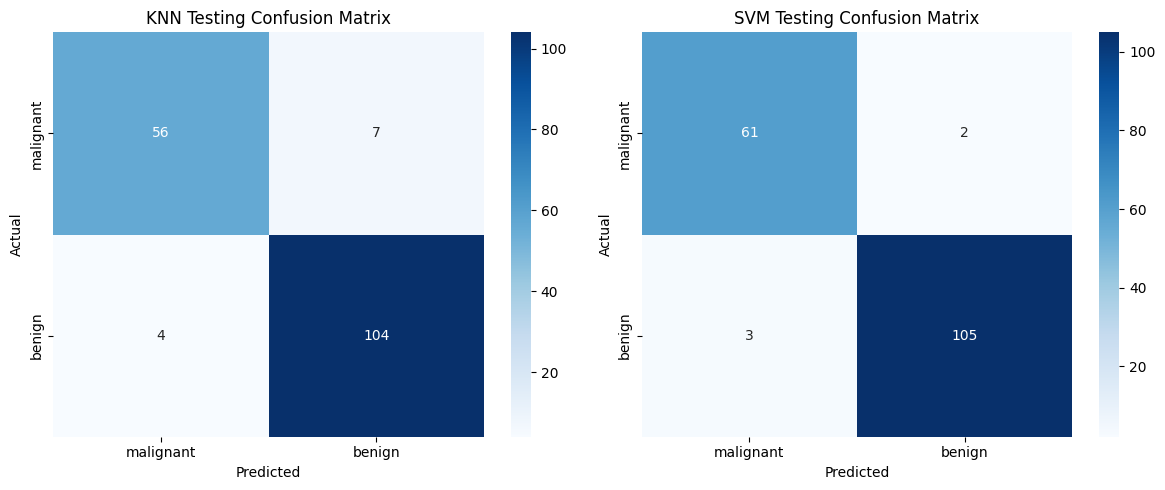

In [20]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [21]:
# Enter your code here:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

In [22]:
# Evaluate the models on the training data
print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("\nKNN Training Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.955
SVM Training Accuracy: 0.972

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



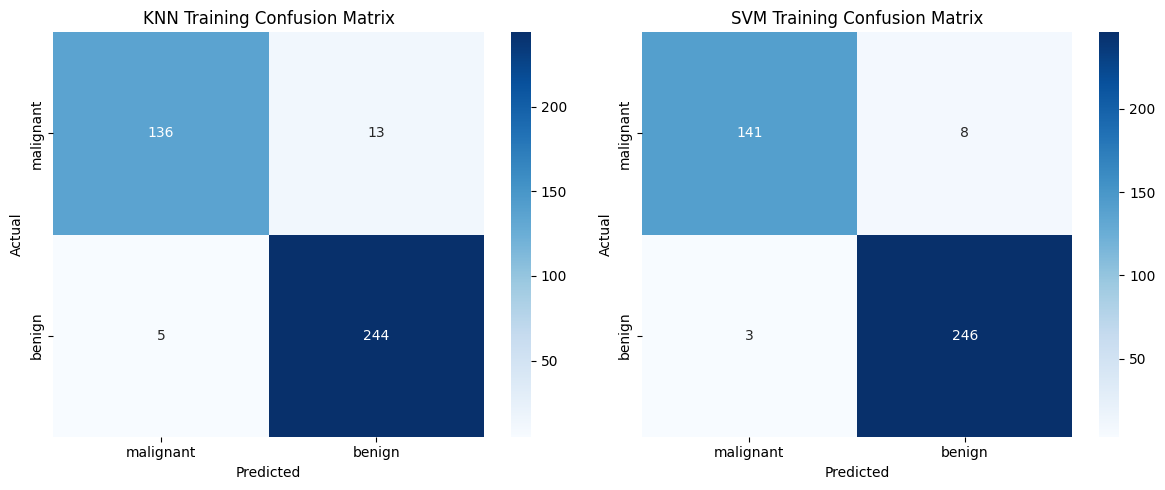

In [ ]:
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0], xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()